In [ ]:
# Primary languages and libraries used...

# Python
# Pandas
# scikit-learn (data processing and modeling)
# xgboost (modeling)
# matplotlib (visualization)

In [ ]:
# Regression problem as we are looking to predict one number/numeric, in this case price, for a selected set of features.

In [81]:
import pandas as pd

In [82]:
# Load the data.

prop_17 = pd.read_csv('properties_2017.csv')

/home/tcbic/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
prop_17.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


Agreed upon / makes sense values for selected features:

Bedrooms: 1-8
Bathrooms: 1-6
Square footage: 400-10,000
Year Built: 1900-present
Tax value: 20,000-10,000,000

In [84]:
# Create a subset of the data based on the above features.

sub_prop_17 = prop_17[['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']]

In [85]:
sub_prop_17.head()

,bedroomcnt,bathroomcnt,taxvaluedollarcnt,calculatedfinishedsquarefeet,yearbuilt
0,0.0,0.0,9.0,NaN,NaN
1,0.0,0.0,27516.0,NaN,NaN
2,0.0,0.0,1434941.0,73026.0,1959.0
3,0.0,0.0,1174475.0,5068.0,1948.0
4,0.0,0.0,440101.0,1776.0,1947.0


In [86]:
# Continue to filter the subset based on the above conditions.

# Bedrooms

sub_prop_17 = sub_prop_17[(sub_prop_17['bedroomcnt'] >= 1) & (sub_prop_17['bedroomcnt'] <= 8)]

In [87]:
# Bathrooms

sub_prop_17 = sub_prop_17[(sub_prop_17['bathroomcnt'] >= 1) & (sub_prop_17['bathroomcnt'] <= 6)]

In [88]:
# Square feet

sub_prop_17 = sub_prop_17[(sub_prop_17['calculatedfinishedsquarefeet'] >= 400) & (sub_prop_17['calculatedfinishedsquarefeet'] <= 10000)]

In [89]:
# Year built

sub_prop_17 = sub_prop_17[(sub_prop_17['yearbuilt'] >= 1900)]

In [90]:
# Tax value

sub_prop_17 = sub_prop_17[(sub_prop_17['taxvaluedollarcnt'] >= 20000) & (sub_prop_17['taxvaluedollarcnt'] <= 10000000)]

In [91]:
# Check for missing values. 

sub_prop_17.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
taxvaluedollarcnt               0
calculatedfinishedsquarefeet    0
yearbuilt                       0
dtype: int64

In [92]:
sub_prop_17.shape

(2831976, 5)

In [93]:
# Check the data types.

sub_prop_17.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
taxvaluedollarcnt               float64
calculatedfinishedsquarefeet    float64
yearbuilt                       float64
dtype: object

In [44]:
# Train/Test split

In [94]:
# Define X and y.

X = sub_prop_17.drop(columns=['taxvaluedollarcnt']).values
y = sub_prop_17['taxvaluedollarcnt'].values

In [95]:
X.shape, y.shape

((2831976, 4), (2831976,))

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# Split X into train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [98]:
# Check the shape.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2123982, 4), (707994, 4), (2123982,), (707994,))

Baseline (Mean) Model

In [99]:
baseline = [y_train.mean().round(0)] * len(y_train)

In [100]:
actual_and_predicted = pd.DataFrame({'Actual': y_train, 'Predicted': baseline})

In [101]:
actual_and_predicted.head()

,Actual,Predicted
0,363248.0,425160.0
1,339721.0,425160.0
2,550328.0,425160.0
3,383763.0,425160.0
4,413029.0,425160.0


In [102]:
actual_and_predicted['Error'] = actual_and_predicted['Actual'] - actual_and_predicted['Predicted']

In [103]:
actual_and_predicted.head()

,Actual,Predicted,Error
0,363248.0,425160.0,-61912.0
1,339721.0,425160.0,-85439.0
2,550328.0,425160.0,125168.0
3,383763.0,425160.0,-41397.0
4,413029.0,425160.0,-12131.0


In [104]:
actual_and_predicted['Absolute Error'] = actual_and_predicted['Error'].abs()

In [105]:
Baseline_MAE = actual_and_predicted['Absolute Error'].mean()

In [106]:
Baseline_MAE

255645.51086873616

Linear Regression Model

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [108]:
model = LinearRegression()

In [109]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_pred = model.predict(X_test)

In [111]:
y_pred

array([ 327588.28805868,  511135.92631229,  182894.31487172, ...,
       1073015.6989955 ,  730492.57708527,  205195.62754822])

In [112]:
# Measure of the fit using mean absolute error.

Linear_Regression_MAE = mean_absolute_error(y_test, y_pred)

print(Linear_Regression_MAE)

# This is representative of the amount in which we would expect our prediction to vary from "ground truth."
# The smaller this number the better your model is performing.

205958.0906945133


Random Forest Regressor Model

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
model2 = RandomForestRegressor()

In [115]:
model2.fit(X_train, y_train)

/home/tcbic/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [116]:
y_pred2 = model2.predict(X_test)

In [117]:
y_pred2

array([ 515451.25180201,  336915.195     ,  304387.96666667, ...,
       2258035.40055556,  480209.5       ,  208388.14      ])

In [118]:
Random_Forest_Regressor_MAE = mean_absolute_error(y_test, y_pred2)
print(Random_Forest_Regressor_MAE)

201894.17084228378


XGBRegressor Model

In [119]:
# Install xgboost.

import sys
!{sys.executable} -m pip install xgboost

In [120]:
import xgboost

In [121]:
from xgboost import XGBRegressor

In [122]:
model3 = XGBRegressor()

In [123]:
model3.fit(X_train, y_train)

[21:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [124]:
y_pred3 = model3.predict(X_test)

In [125]:
y_pred3

array([ 340113.44,  470089.44,  265092.16, ..., 1250897.5 ,  618081.06,
        215068.9 ], dtype=float32)

In [126]:
XGB_Regressor_MAE = mean_absolute_error(y_test, y_pred3)

print(XGB_Regressor_MAE)

195619.871061308


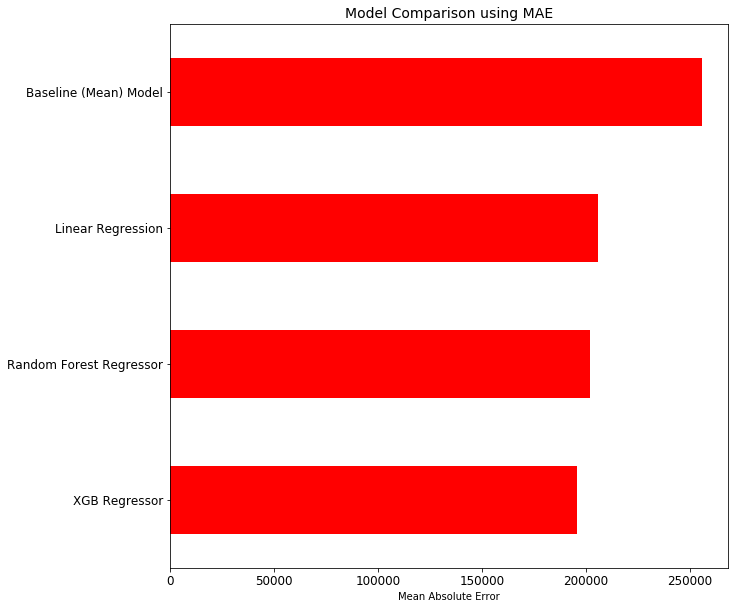

In [132]:
# Model Comparison Plot

%matplotlib inline
import matplotlib.pyplot as plt

model_comparison_df = pd.DataFrame({"Model": ["Baseline (Mean) Model", "Linear Regression", "Random Forest Regressor", "XGB Regressor"], "MAE": [Baseline_MAE, Linear_Regression_MAE, Random_Forest_Regressor_MAE, XGB_Regressor_MAE]})

model_comparison_df.sort_values("MAE", ascending=True).plot(x="Model", y="MAE", kind="barh", color="red", legend=False, figsize=(10,10))

plt.ylabel(""); 
plt.yticks(size=12); 
plt.xlabel("Mean Absolute Error"); 
plt.xticks(size=12)
plt.title("Model Comparison using MAE", size=14);

In [ ]:
# The model with the lowest MAE is XGB Regressor, and we'll choose to use this model given that.